<a href="https://colab.research.google.com/github/MahdiNavaei/Books-Recommendation-System/blob/main/Books_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

sns.set()

## Data preprocessing

#### We will only need the books.csv and ratings.csv as those two files contains all the information we need for our model.

In [3]:
books = pd.read_csv('/content/drive/MyDrive/Projects/Books-Recommendation-System/books.csv')

ratings = pd.read_csv('/content/drive/MyDrive/Projects/Books-Recommendation-System/ratings.csv')

In [4]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

**As we can see there are a lot of unncessary features which we won't be needing in recommendation**

We will grab the relevant features only

In [5]:
columns = ['id', 'book_id', 'isbn', 'authors', 'original_publication_year', 'title', 'average_rating',
           'ratings_count', 'small_image_url']

books_new = books[columns]

books_new.head()

,id,book_id,isbn,authors,original_publication_year,title,average_rating,ratings_count,small_image_url
0,1,2767052,439023483,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,https://images.gr-assets.com/books/1447303603s...
1,2,3,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,https://images.gr-assets.com/books/1474154022s...
2,3,41865,316015849,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",3.57,3866839,https://images.gr-assets.com/books/1361039443s...
3,4,2657,61120081,Harper Lee,1960.0,To Kill a Mockingbird,4.25,3198671,https://images.gr-assets.com/books/1361975680s...
4,5,4671,743273567,F. Scott Fitzgerald,1925.0,The Great Gatsby,3.89,2683664,https://images.gr-assets.com/books/1490528560s...


In [6]:
books_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   isbn                       9300 non-null   object 
 3   authors                    10000 non-null  object 
 4   original_publication_year  9979 non-null   float64
 5   title                      10000 non-null  object 
 6   average_rating             10000 non-null  float64
 7   ratings_count              10000 non-null  int64  
 8   small_image_url            10000 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 703.2+ KB


### Checking null values

#### For books

In [7]:
books_new.isna().sum()

id                             0
book_id                        0
isbn                         700
authors                        0
original_publication_year     21
title                          0
average_rating                 0
ratings_count                  0
small_image_url                0
dtype: int64

As we can see we got some null values here. But we are not going to use only our ratings dataset for our model so we will just fill those empy data points with 'NA'

In [8]:
books_new = books_new.fillna('NA')
books_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   isbn                       10000 non-null  object 
 3   authors                    10000 non-null  object 
 4   original_publication_year  10000 non-null  object 
 5   title                      10000 non-null  object 
 6   average_rating             10000 non-null  float64
 7   ratings_count              10000 non-null  int64  
 8   small_image_url            10000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 703.2+ KB


This dataset will be used for recommending the books to customers.

#### For ratings

In [9]:
ratings.isna().sum()

book_id    0
user_id    0
rating     0
dtype: int64

There is no null value here.

#### There is not much preprocessing needed further as the relevant books details are already extracted and null values have been dealt with. We will now save the dataset for later use during recommendation.

In [10]:
books_new.to_csv('books_cleaned.csv')

## Data description

In [11]:
books.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [12]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


In [14]:
ratings.describe()

,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000


## Exploratory Data Analysis

Let's explore the top rated books

[]

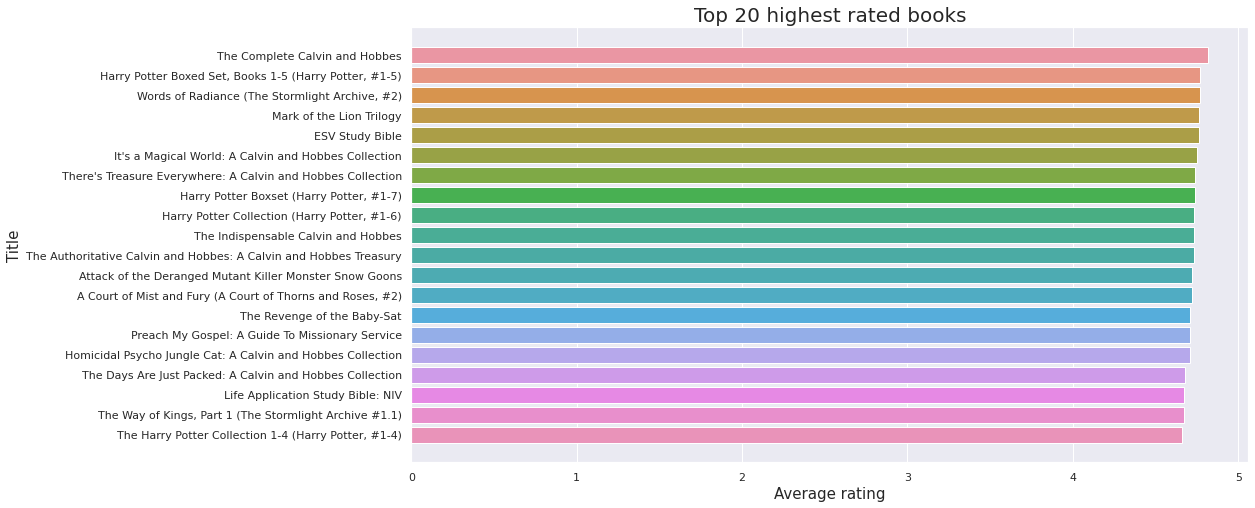

In [15]:
top_rated = books.sort_values('average_rating', ascending=False)
top_rated = top_rated[:20]

plt.figure(figsize = (15,8))
sns.barplot(data = top_rated, y = 'title', x = 'average_rating')
plt.ylabel('Title', fontsize = 15)
plt.xlabel('Average rating', fontsize = 15)
plt.title('Top 20 highest rated books', fontsize = 20)

plt.plot()

Now let's find out the top 20 most popular books

[]

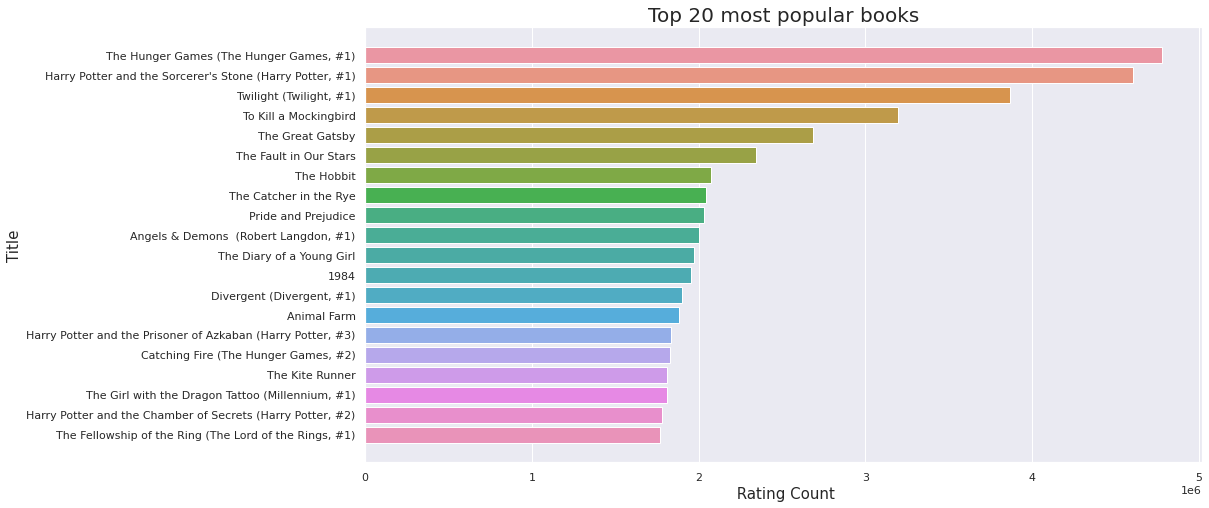

In [16]:
top_popular = books.sort_values('ratings_count', ascending=False)
top_popular = top_popular[:20]

plt.figure(figsize = (15,8))
sns.barplot(data = top_popular, y = 'title', x = 'ratings_count')
plt.ylabel('Title', fontsize = 15)
plt.xlabel(' Rating Count', fontsize = 15)
plt.title('Top 20 most popular books', fontsize = 20)

plt.plot()

**Top authors**

[]

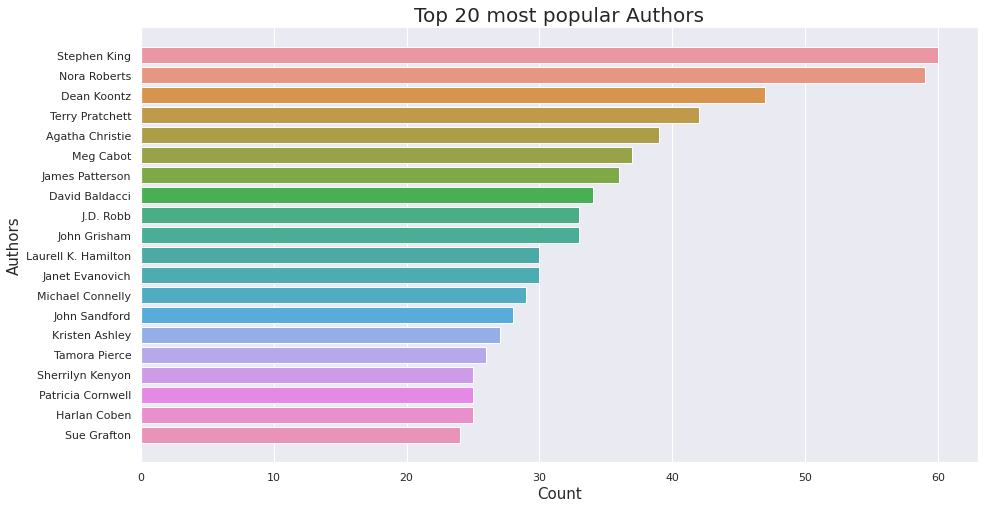

In [17]:
top_author_counts = books['authors'].value_counts().reset_index()
top_author_counts.columns = ['authors', 'count']
top_author_counts = top_author_counts.sort_values('count', ascending=False)

plt.figure(figsize = (15,8))
sns.barplot(data = top_author_counts.head(20), y = 'authors', x = 'count')
plt.ylabel('Authors', fontsize = 15)
plt.xlabel('Count', fontsize = 15)
plt.title('Top 20 most popular Authors', fontsize = 20)

plt.plot()

**Most ratings**

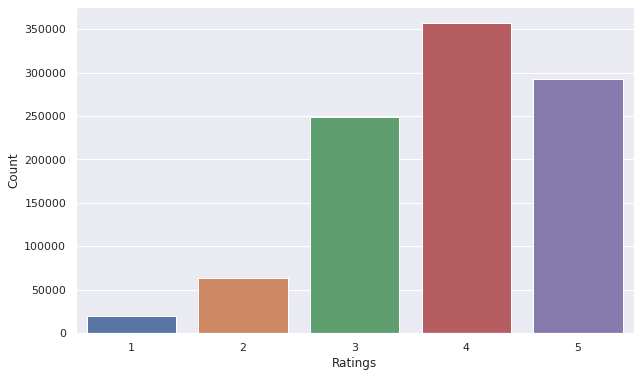

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data = ratings, x = 'rating')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

##### People tend to give 4 star rating to most books

# Model

## Splitting the data

In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(ratings, test_size=0.2, random_state=42)

print(f"Shape of train data: {train.shape}")
print(f"Shape of test data: {test.shape}")

Shape of train data: (785404, 3)
Shape of test data: (196352, 3)


We will use the test set for validation purpose only.

### Basic overview of the architecture

The Neural Network architecture we’re going to create will have two input embedding layers. The first embedding layer accepts the books, and the second the users. These two embeddings are trained separately and then combined together before being passed to a dense layer.


In [20]:
book_id = ratings.book_id.nunique() 

user_id = ratings.user_id.nunique()

In [21]:
print('Total books: ' + str(book_id))
print('Total users: ' + str(user_id))

Total books: 10000
Total users: 53424


## Model building

In [22]:
from tensorflow.keras.layers import Dense, Flatten, Input, Embedding, Concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [23]:
#Embedding layer for books
books_input = Input(shape=[1])#1st Input Layer
embedding_layer_books = Embedding(book_id + 1,10)(books_input)#Embedding layer
embedding_output_books = Flatten()(embedding_layer_books)#Embedding layer output

#Embedding layer for users
users_input = Input(shape=[1])#1st Input Layer
embedding_layer_users = Embedding(user_id + 1,10)(users_input)#Embedding layer
embedding_output_users = Flatten()(embedding_layer_users)#Embedding layer output

**Note:** We are appending the input layers on top of embedding layers. This is an action of functional API. It basically means that the outputs of those input layers is passed on to the embedding layers.

In [24]:
#Concatination and Dense layer

joining_layer = Concatenate()([embedding_output_books, embedding_output_users])
hidden_layer_1 = Dense(128, activation='relu')(joining_layer)
hidden_layer_1 = Dropout(0.5)(hidden_layer_1)

output_layer = hidden_layer_2 = Dense(1)(hidden_layer_1)

model = tf.keras.Model([books_input, users_input], output_layer)

**Note:** Here also we passed the output of the joining layer to the hidden dense layer, output of the hidden layer to the final output layer. 

In [25]:
#Model compilation

optimizer = Adam(lr=0.001, epsilon = 1e-6, amsgrad=True) #epsilon = decay rate
model.compile(optimizer = optimizer, loss = 'mean_squared_error')#Using mean squared error as loss function

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 10)        100010      ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 10)        534250      ['input_2[0][0]']                
                                                                                              

In [26]:
#Training model

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 1)

model.fit(
    [train.book_id, train.user_id], train.rating, 
    batch_size=64, 
    epochs=15, 
    verbose=1,
    callbacks = [early_stopping],
    validation_data=([test.book_id, test.user_id], test.rating))

Epoch 1/15
12272/12272 [==============================] - 63s 5ms/step - loss: 1.0182 - val_loss: 0.7253
Epoch 2/15
12272/12272 [==============================] - 57s 5ms/step - loss: 0.7926 - val_loss: 0.7117
Epoch 3/15
12272/12272 [==============================] - 66s 5ms/step - loss: 0.7412 - val_loss: 0.7096
Epoch 4/15
12272/12272 [==============================] - 55s 4ms/step - loss: 0.7099 - val_loss: 0.7075
Epoch 5/15
12272/12272 [==============================] - 59s 5ms/step - loss: 0.6861 - val_loss: 0.7029
Epoch 6/15
12272/12272 [==============================] - 61s 5ms/step - loss: 0.6648 - val_loss: 0.7035


<AxesSubplot:>

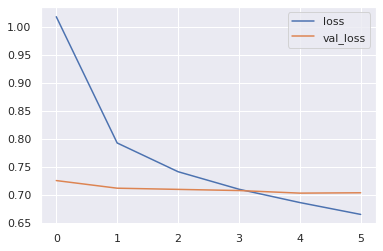

In [27]:
loss = pd.DataFrame(model.history.history)

loss[['loss', 'val_loss']].plot()

In [28]:
#Saving the model
model.save('model.h5')

### Loading the model

In [29]:
model = tf.keras.models.load_model('model.h5')

In [31]:
books = books.drop('Unnamed: 0', axis = 1)

In [32]:
books.head(3)

,id,book_id,isbn,authors,original_publication_year,title,average_rating,ratings_count,small_image_url
0,1,2767052,439023483,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,https://images.gr-assets.com/books/1447303603s...
1,2,3,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,https://images.gr-assets.com/books/1474154022s...
2,3,41865,316015849,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",3.57,3866839,https://images.gr-assets.com/books/1361039443s...


In [33]:
#Defining a function that will recommend top 5 books
def recommend(user_id):

  book_id = list(ratings.book_id.unique()) #grabbing all the unique books
  
  book_arr = np.array(book_id) #geting all book IDs and storing them in the form of an array
  user_arr = np.array([user_id for i in range(len(book_id))])
  prediction = model.predict([book_arr, user_arr])
  
  prediction = prediction.reshape(-1) #reshape to single dimension
  prediction_ids = np.argsort(-prediction)[0:5]

  recommended_books = pd.DataFrame(books.iloc[prediction_ids], columns = ['book_id', 'isbn', 'authors', 'title', 'average_rating' ])
  print('Top 5 recommended books for you: \n')
  return recommended_books

**So basically what's happening here is that, based on a particular user, the model learns the user's behaviour and predicts the user's ratings that he/she might rate on all the books. Then with the .argsort() we are sorting those predictions and returning the top 5 ratings's  indices . After that according to those indices , we are mapping the books from the books dataset and recommending the top 5 books that the user might like.**

In [34]:
ratings.user_id.unique().max()

53424

In [35]:
#Enter a number between 1 and 53424
recommend(789)

313/313 [==============================] - 1s 3ms/step
Top 5 recommended books for you: 



,book_id,isbn,authors,title,average_rating
6589,59715,751507954,Bill Watterson,The Authoritative Calvin and Hobbes: A Calvin ...,4.73
861,17332218,765326361,Brandon Sanderson,"Words of Radiance (The Stormlight Archive, #2)",4.77
5206,24818,836217357,Bill Watterson,The Days Are Just Packed: A Calvin and Hobbes ...,4.68
3627,24812,740748475,Bill Watterson,The Complete Calvin and Hobbes,4.82
6919,24815,751500283,Bill Watterson,The Indispensable Calvin and Hobbes,4.73
